In [1]:
import pandas as pd
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt
import json
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Datasource: https://www.kaggle.com/datasnaek/youtube-new

# Save filenames

files = []
dir = r'D:\Python\Code\Kaggle_YouTube_new\archive'
for f_name in os.listdir(dir):
    if f_name.endswith('.json') or f_name.endswith('.csv'):
        files.append(f_name)

if len(files) % 2 != 0:
    print('The dataset does not consist of paired files by country')

In [4]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [5]:
# Go through the JSON & csv files, pair together files from the same country and merge it into a single file + save it

countries = []
for file in sorted(files):
    #print(file)
    if file.endswith('.json'):
        with open(dir+"\\"+file) as f:
            file_json = json.load(f)
        #Transform JSON into a dataframe 
        file_json = json_normalize(file_json['items'], sep = "_")
        file_json['id']=file_json['id'].astype(int)
    if file.endswith('.csv'):
        file_csv = pd.read_csv(dir+"\\"+file, encoding = "ISO-8859-1")
        file_csv['category_id']=file_csv['category_id'].astype(int)
        country = file[0:2] # current country short name, will be used for a filename
        countries.append(country) # all countries will be used to loop through to plot charts
        country_df = pd.merge(file_csv, file_json, how='left', left_on = 'category_id', right_on = 'id')
        country_df['country'] = country
        country_df.to_csv(dir+"\\output\\"+country+'.csv') #save each file to csv as a {country short name}.csv

In [6]:
countries

['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']

# Countries & video categories relationship

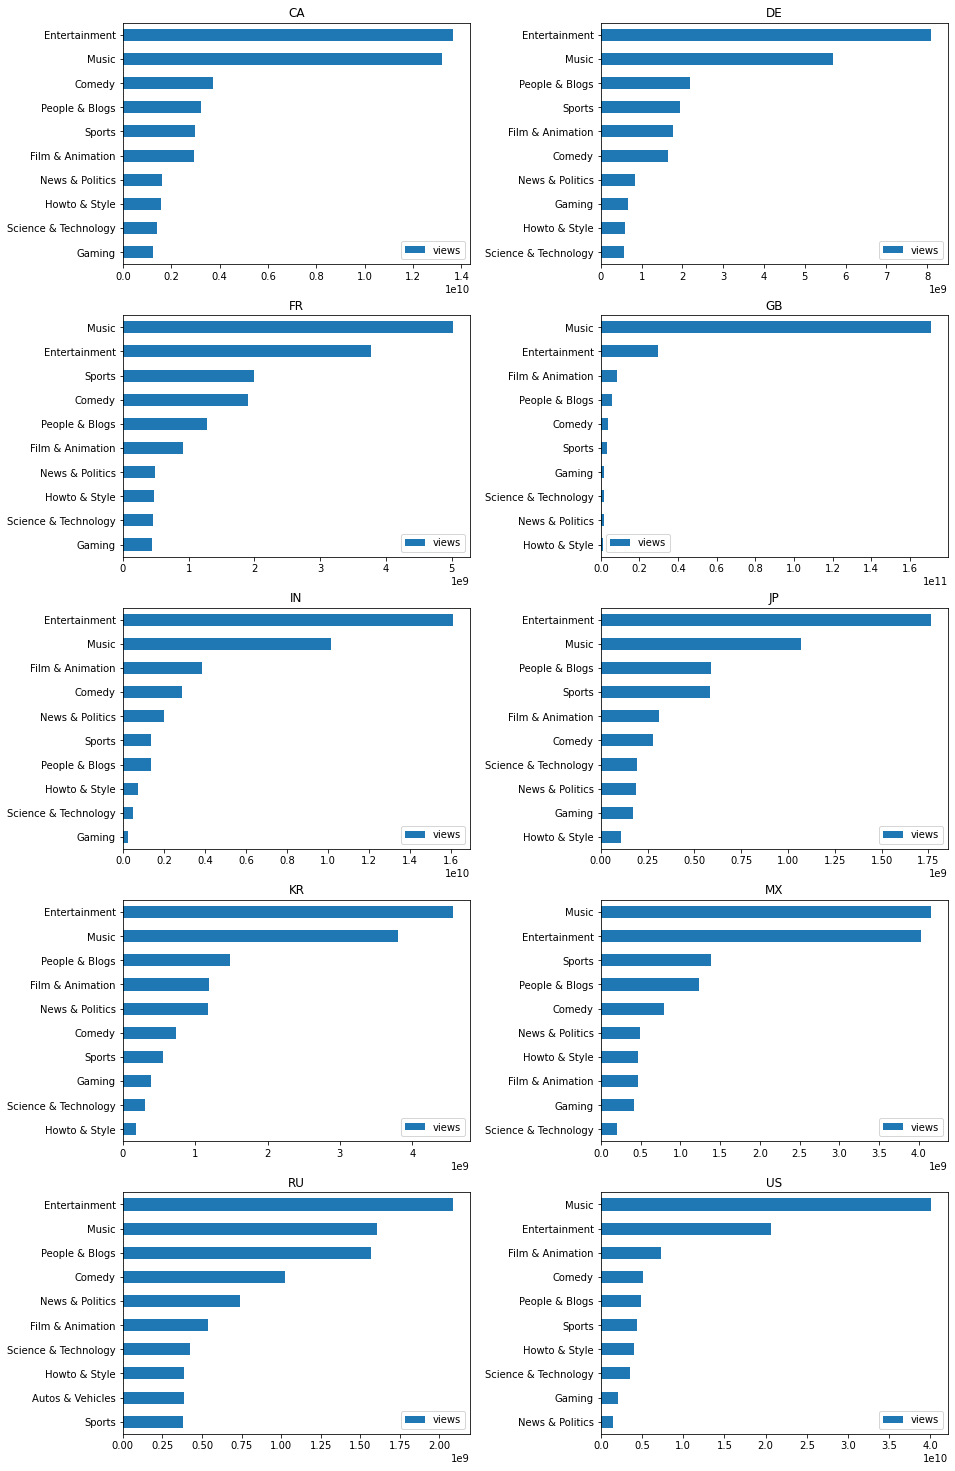

In [7]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

plt.tight_layout(pad=0.4, w_pad=10, h_pad=3.0)

# unpack all the axes subplots
axe = axes.ravel()

for i, country in enumerate(countries):
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    #pd.value_counts(country_data['snippet_title'])[:10].sort_values().plot(kind='barh', ax=axe[i], title=country)
    #country_data.plot(x='snippet_title', y='views', kind='barh', ax=axe[i], title=country)
    
    # Group by channel name (snippet title) with sums by views, likes and dislikes
    grouped = country_data.groupby(['snippet_title'])[['views']].sum()
    # Reset index so it allows to plot
    grouped_reset = pd.DataFrame(grouped.reset_index(), 
                            columns=['snippet_title', 'views'])
    # Plot top 10 by views
    grouped_reset = grouped_reset.sort_values(by=['views'], ascending=0).head(10)
    grouped_reset.sort_values(by=['views'], ascending=1).plot(x='snippet_title', y='views',\
                                                                     kind='barh', ax=axe[i], title=country)
    axe[i].yaxis.set_label_text('') #hides the 'snippet_title' in y axes

# Countries & YouTube channels relationship

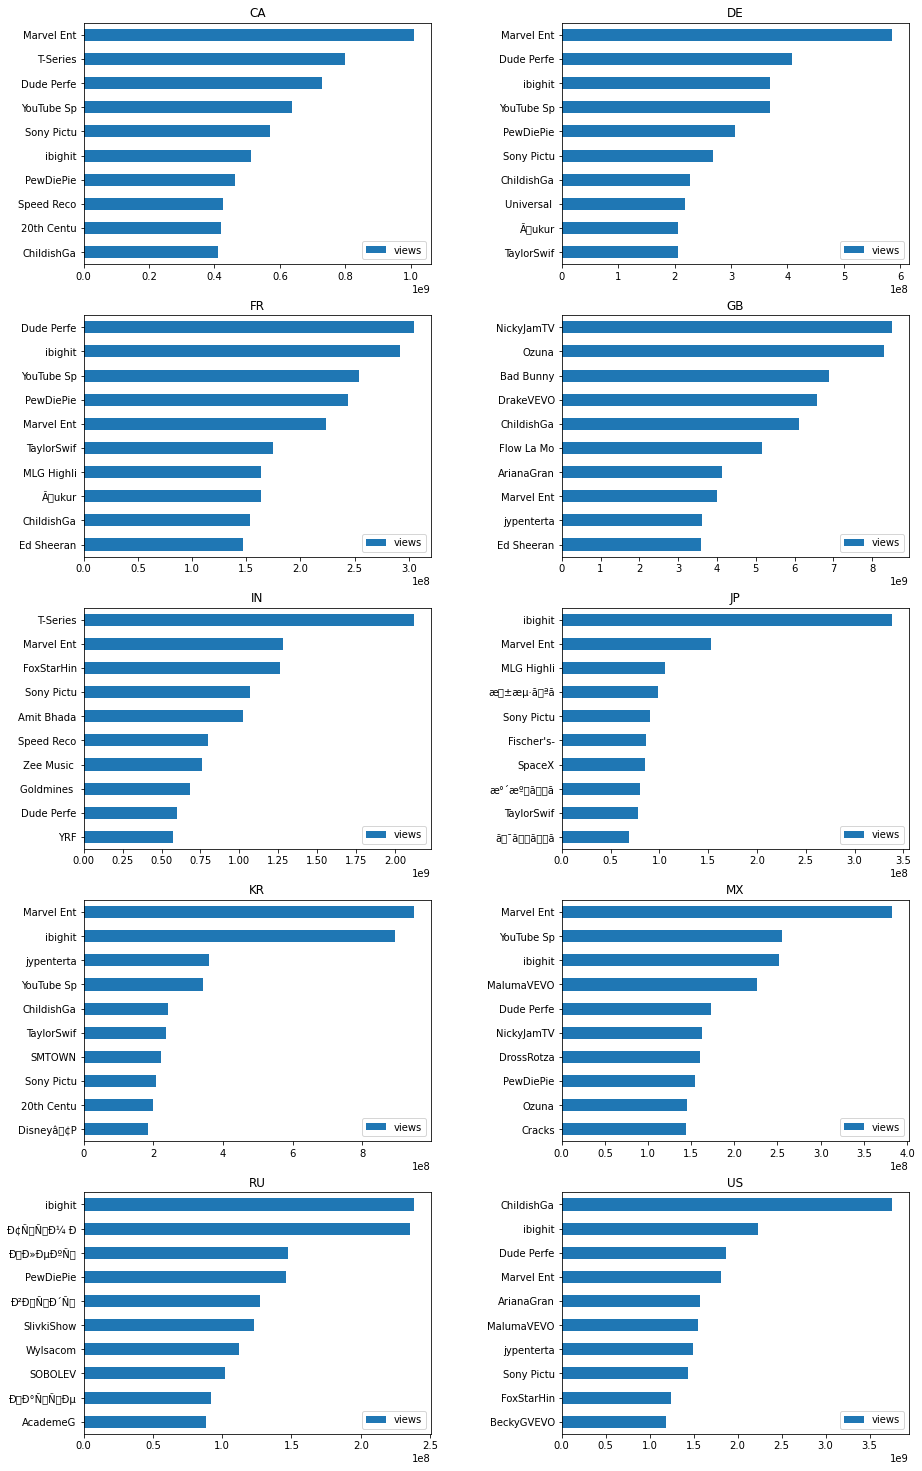

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

plt.tight_layout(pad=0.4, w_pad=10, h_pad=3.0)

# unpack all the axes subplots
axe = axes.ravel()

plt.rcParams["axes.formatter.use_mathtext"] = True

#plt.gca().set_xticklabels([i.get_text().replace('−', '$-$') for i in ax.get_xticklabels()])
#plt.gca().set_yticklabels([i.get_text().replace('−', '$-$') for i in ax.get_yticklabels()])

for i, country in enumerate(countries):
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    country_data['channel_title'] = country_data['channel_title'].apply(lambda x: x[:10]) #limit the label lenght
    #pd.value_counts(country_data['channel_title'])[:10].sort_values().plot(kind='barh', ax=axe[i], title=country)
    
    # Group by channel name (snippet title) with sums by views, likes and dislikes
    grouped = country_data.groupby(['channel_title'])[['views']].sum()
    # Reset index so it allows to plot
    grouped_reset = pd.DataFrame(grouped.reset_index(), 
                            columns=['channel_title', 'views'])
    # Plot top 10 by views
    grouped_reset = grouped_reset.sort_values(by=['views'], ascending=0).head(10)
    grouped_reset.sort_values(by=['views'], ascending=1).plot(x='channel_title', y='views',\
                                                                     kind='barh', ax=axe[i], title=country)
    axe[i].yaxis.set_label_text('') #hides the 'snippet_title' in y axes

# Views, likes and dislikes relationships in different countries

In [9]:
for country in countries:
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    print(country + " Likes to views: " + str("{:.2f} %".format(country_data['likes'].sum()/country_data['views'].sum()*100)) +\
          ", Dislikes to views: " + str("{:.2f} %".format(country_data['dislikes'].sum()/country_data['views'].sum()*100)) + \
          ", Dislikes to likes: " + str("{:.2f} %".format(country_data['dislikes'].sum()/country_data['likes'].sum()*100)))

CA Likes to views: 3.45 %, Dislikes to views: 0.18 %, Dislikes to likes: 5.08 %
DE Likes to views: 3.63 %, Dislikes to views: 0.23 %, Dislikes to likes: 6.39 %
FR Likes to views: 4.14 %, Dislikes to views: 0.19 %, Dislikes to likes: 4.69 %
GB Likes to views: 2.28 %, Dislikes to views: 0.13 %, Dislikes to likes: 5.66 %
IN Likes to views: 2.55 %, Dislikes to views: 0.16 %, Dislikes to likes: 6.15 %
JP Likes to views: 3.08 %, Dislikes to views: 0.14 %, Dislikes to likes: 4.55 %
KR Likes to views: 2.87 %, Dislikes to views: 0.13 %, Dislikes to likes: 4.42 %
MX Likes to views: 4.63 %, Dislikes to views: 0.22 %, Dislikes to likes: 4.71 %
RU Likes to views: 5.17 %, Dislikes to views: 0.61 %, Dislikes to likes: 11.86 %
US Likes to views: 3.15 %, Dislikes to views: 0.16 %, Dislikes to likes: 5.00 %


# Likes/Views by Category and Country

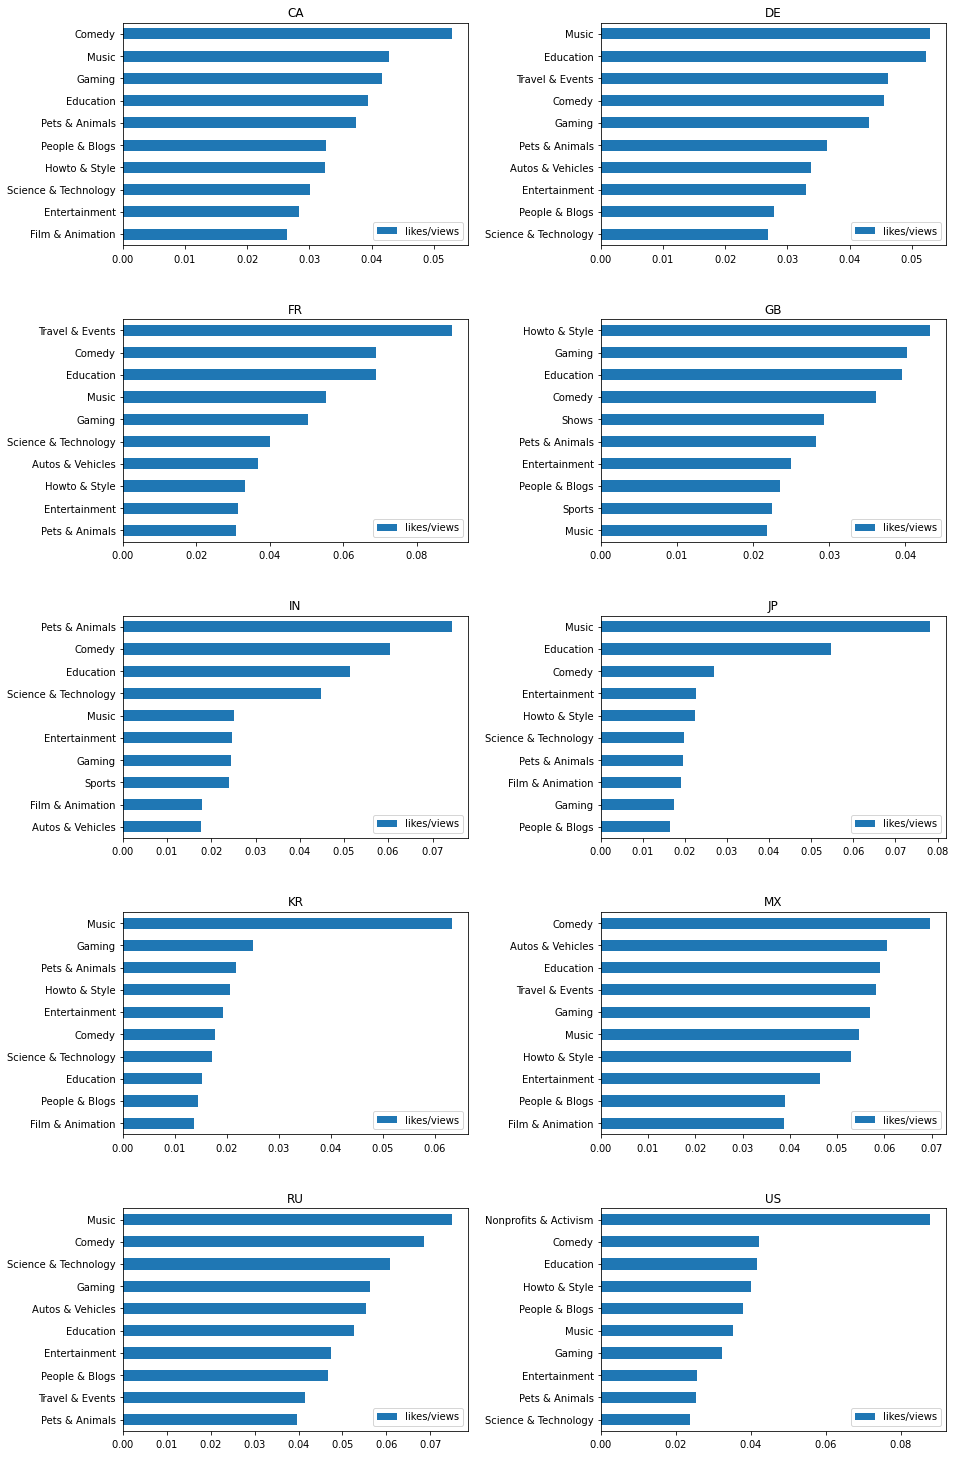

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Set padding between charts
plt.tight_layout(pad=0.4, w_pad=10, h_pad=5)

# Unpack all the axes subplots
axe = axes.ravel()

for i, country in enumerate(countries):
    
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    
    # Group by channel name (snippet title) with sums by views, likes and dislikes
    grouped = country_data.groupby(['snippet_title'])[['views', 'likes', 'dislikes']].sum()
    # Reset index so it allows to plot
    grouped_reset = pd.DataFrame(grouped.reset_index(), 
                            columns=['snippet_title', 'views', 'likes', 'dislikes'])
    # Adding new calculated columns
    grouped_reset['likes/views'] = grouped_reset['likes'] / grouped_reset['views']
    grouped_reset['dislikes/views'] = grouped_reset['dislikes'] / grouped_reset['views']
    grouped_reset['dislikes/likes'] = grouped_reset['dislikes'] / grouped_reset['likes']
    
    # Plot both likes and dislikes
    #grouped_reset.sort_values(by=['likes/views']).plot(x='snippet_title', y=['likes/views', 'dislikes/views'],\
    #                                                                 kind='barh', ax=axe[i], title=country)
    
    # Plot top 10 by likes/views only
    grouped_reset = grouped_reset.sort_values(by=['likes/views'], ascending=0).head(10)
    grouped_reset.sort_values(by=['likes/views'], ascending=1).plot(x='snippet_title', y='likes/views',\
                                                                     kind='barh', ax=axe[i], title=country)    
    
    #grouped_reset.sort_values(by=['likes/views']).plot(x='snippet_title', y='likes/views',\
                                                                     #kind='barh', ax=axe[i], title=country)
    axe[i].yaxis.set_label_text('') #hides the 'snippet_title' in y axes

# Disikes/Views by Category and Country

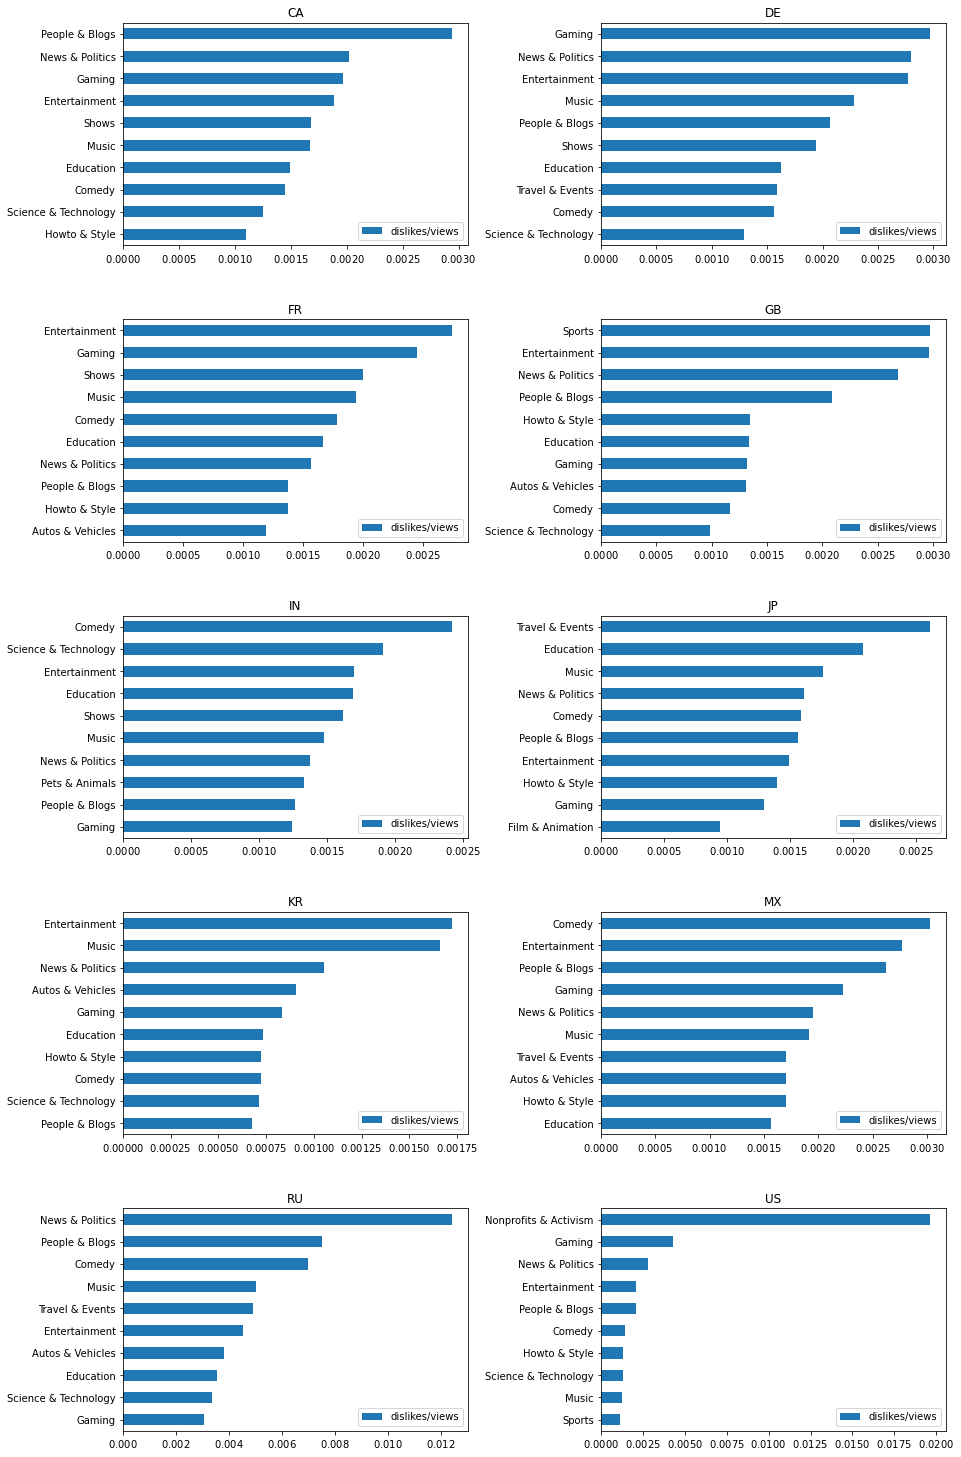

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Set padding between charts
plt.tight_layout(pad=0.4, w_pad=10, h_pad=5)

# Unpack all the axes subplots
axe = axes.ravel()

for i, country in enumerate(countries):
    
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    
    # Group by channel name (snippet title) with sums by views, likes and dislikes
    grouped = country_data.groupby(['snippet_title'])[['views', 'likes', 'dislikes']].sum()
    # Reset index so it allows to plot
    grouped_reset = pd.DataFrame(grouped.reset_index(), 
                            columns=['snippet_title', 'views', 'likes', 'dislikes'])
    # Adding new calculated columns
    grouped_reset['likes/views'] = grouped_reset['likes'] / grouped_reset['views']
    grouped_reset['dislikes/views'] = grouped_reset['dislikes'] / grouped_reset['views']
    grouped_reset['dislikes/likes'] = grouped_reset['dislikes'] / grouped_reset['likes']
    
    # Plot both likes and dislikes
    #grouped_reset.sort_values(by=['likes/views']).plot(x='snippet_title', y=['likes/views', 'dislikes/views'],\
    #                                                                 kind='barh', ax=axe[i], title=country)
    
    # Plot top 10 dislikes/views only
    grouped_reset = grouped_reset.sort_values(by=['dislikes/views'], ascending=0).head(10)
    grouped_reset.sort_values(by=['dislikes/views'], ascending=1).plot(x='snippet_title', y='dislikes/views',\
                                                                     kind='barh', ax=axe[i], title=country)   
    
    #grouped_reset.sort_values(by=['dislikes/views']).plot(x='snippet_title', y=['dislikes/views'],\
                                                                     #kind='barh', ax=axe[i], title=country)
    axe[i].yaxis.set_label_text('') #hides the 'snippet_title' in y axes

# What channels are watched in most of the countries

In [12]:
# channels in all countries
# save unique channels for every country, merge and count occurencies (every occurence will refer to one country)
all_channels = []
for country in countries:
    country_data = pd.read_csv(dir+"\\output\\"+country+'.csv')
    country_data['channel_title'] = country_data['channel_title']#.apply(lambda x: x[:10]) #limit the label lenght
    unique_channel = []
    for country_channels in country_data['channel_title']:
        if country_channels not in unique_channel:
            unique_channel.append(country_channels)
    all_channels.append(unique_channel)

In [13]:
all_channels[0][:10]

['EminemVEVO',
 'iDubbbzTV',
 'Rudy Mancuso',
 'nigahiga',
 'Ed Sheeran',
 'DramaAlert',
 'VanossGaming',
 'CaseyNeistat',
 'Logan Paul Vlogs',
 'Sheikh Musa']

In [14]:
# From list of lists create a single list
all_channels_list = []
for i in all_channels:
    for k in i:
        all_channels_list.append(k)
#all_channels_list

In [15]:
# Count frequencies

from collections import Counter
freq_channels = Counter(all_channels_list)

# Sort the result
freq_channels = dict(sorted(freq_channels.items(), key=lambda item: item[1], reverse=True))

# Print channels names, which are present in all the countries
for k, v in freq_channels.items():
    if v == len(countries):
        print(k, v)

Ed Sheeran 10
BuzzFeedVideo 10
The Late Late Show with James Corden 10
Unbox Therapy 10
The Tonight Show Starring Jimmy Fallon 10
Jimmy Kimmel Live 10
5-Minute Crafts 10
20th Century Fox 10
TheEllenShow 10
Warner Bros. Pictures 10
Paramount Pictures 10
PewDiePie 10
SiaVEVO 10
Apple 10
Marvel Entertainment 10
Sony Pictures Entertainment 10
Universal Pictures 10
TaylorSwiftVEVO 10
SpaceX 10
ABC Television Network 10
CalvinHarrisVEVO 10
